___

In [1]:
# Import libraries to be used

# Warning messages display
# import warnings
# warnings.filterwarnings(action='once') # https://docs.python.org/3/library/warnings.html#the-warnings-filter

# Directories/Files management
import os.path
## from zipfile import ZipFile # De momento no ha hecho falta 

# Timing
import time

# Data analysis and wrangling
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # Show all columns in DataFrames
pd.set_option('display.max_rows', 100) # If too high, it greatly slows down the output display and freezes the kernel


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot') # choose a style: 'plt.style.available'
sns.set_theme(context='notebook',
              style="darkgrid") # {darkgrid, whitegrid, dark, white, ticks}
palette = sns.color_palette("flare", as_cmap=True);
import altair as alt

# Machine Learning
## from sklearn.[...] import ...

In [2]:
%load_ext memory_profiler

In [3]:
t0 = time.perf_counter() 

In [4]:
# Detect Operating System running and manage paths accordingly

if os.name == 'nt': # Windows
    root = r"C:\Users\turge\CompartidoVM\0.TFM"
    print("Running on Windows.")
elif os.name == 'posix': # Ubuntu
    root = "/home/dsc/shared/0.TFM"
    print("Running on Ubuntu.")
print("root path\t", root)

Running on Windows.
root path	 C:\Users\turge\CompartidoVM\0.TFM


# Load the dataset

In [5]:
cols = [
    'MONTH',
#     'DAY_OF_MONTH',
    'DAY_OF_WEEK',
    'OP_UNIQUE_CARRIER',
#     'TAIL_NUM',
    'ORIGIN',
#     'ORIGIN_CITY_NAME',
#     'ORIGIN_STATE_ABR',
#     'ORIGIN_STATE_NM',
#     'WBAN_Origin_OTP',
    'DEST',
#     'DEST_CITY_NAME',
#     'DEST_STATE_ABR',
#     'DEST_STATE_NM',
#     'WBAN_Dest_OTP',
#     'CRS_DEP_TIME',
#     'DEP_TIME',
#     'DEP_DELAY',
#     'DEP_DEL15',
    'DEP_TIME_hour',
#     'TAXI_OUT',
#     'TAXI_IN',
    'TAXI_OUT_median',
    'TAXI_IN_median',
#     'CRS_ARR_TIME',
#     'ARR_TIME',
#     'ARR_DELAY',
    'ARR_DEL15', # → Target !!
    'ARR_TIME_hour',
#     'CANCELLED',
#     'CRS_ELAPSED_TIME',
#     'DISTANCE',
    'DISTANCE_GROUP',
#     'CARRIER_DELAY',
#     'WEATHER_DELAY',
#     'NAS_DELAY',
#     'SECURITY_DELAY',
#     'LATE_AIRCRAFT_DELAY',
    
#     'STATION_Origin',
#     'WMO_Origin',
#     'WBAN_Origin_LCD',
#     'LATITUDE_Origin',
#     'LONGITUDE_Origin',
    'HourlyAltimeterSetting_Origin',
    'HourlyDryBulbTemperature_Origin',
    'HourlyPrecipitation_Origin',
    'HourlyRelativeHumidity_Origin',
    'HourlySkyConditions_Origin',
    'HourlyVisibility_Origin',
#     'HourlyWindDirection_Origin',
    'HourlyWindGustSpeed_Origin',
    'HourlyWindSpeed_Origin',
#     'REM_Origin',
#     'STATION_Dest',
#     'WMO_Dest',
#     'WBAN_Dest_LCD',
#     'LATITUDE_Dest',
#     'LONGITUDE_Dest',
    'HourlyAltimeterSetting_Dest',
    'HourlyDryBulbTemperature_Dest',
    'HourlyPrecipitation_Dest',
    'HourlyRelativeHumidity_Dest',
    'HourlySkyConditions_Dest',
    'HourlyVisibility_Dest',
#     'HourlyWindDirection_Dest',
    'HourlyWindGustSpeed_Dest',
    'HourlyWindSpeed_Dest',
#     'REM_Dest'
]

In [6]:
cols_dtypes = {
    'MONTH' : 'string',
#     'DAY_OF_MONTH' : 'string',
    'DAY_OF_WEEK' : 'string',
    'OP_UNIQUE_CARRIER' : 'string',
#     'TAIL_NUM' : 'string',
    'ORIGIN' : 'string',
#     'ORIGIN_CITY_NAME' : 'string',
#     'ORIGIN_STATE_ABR' : 'string',
#     'ORIGIN_STATE_NM' : 'string',
#     'WBAN_Origin_OTP' : 'string',
    'DEST' : 'string',
#     'DEST_CITY_NAME' : 'string',
#     'DEST_STATE_ABR' : 'string',
#     'DEST_STATE_NM' : 'string',
#     'WBAN_Dest_OTP' : 'string',
#     'CRS_DEP_TIME' : 'string',
#     'DEP_TIME' : 'string',
#     'DEP_DELAY' : 'int32',
#     'DEP_DEL15' : 'int32',
    'DEP_TIME_hour' : 'string',
#     'TAXI_OUT' : 'int32',
#     'TAXI_IN' : 'int32',
    'TAXI_OUT_median' : 'int32',
    'TAXI_IN_median' : 'int32',
#     'CRS_ARR_TIME' : 'string',
#     'ARR_TIME' : 'string',
#     'ARR_DELAY' : 'int32',
    'ARR_DEL15' : 'int32', # → Target !!
    'ARR_TIME_hour' : 'string',
#     'CANCELLED' : 'string',
#     'CRS_ELAPSED_TIME' : 'int32',
#     'DISTANCE' : 'int32',
    'DISTANCE_GROUP' : 'string',
#     'CARRIER_DELAY' : 'int32',
#     'WEATHER_DELAY' : 'int32',
#     'NAS_DELAY' : 'int32',
#     'SECURITY_DELAY' : 'int32',
#     'LATE_AIRCRAFT_DELAY' : 'int32',

#     'STATION_Origin' : 'string',
#     'WMO_Origin' : 'string',
#     'WBAN_Origin_LCD' : 'string',
#     'LATITUDE_Origin' : 'float64',
#     'LONGITUDE_Origin' : 'float64',
    'HourlyAltimeterSetting_Origin' : 'float64',
    'HourlyDryBulbTemperature_Origin' : 'float64',
    'HourlyPrecipitation_Origin' : 'float64',
    'HourlyRelativeHumidity_Origin' : 'float64',
    'HourlySkyConditions_Origin' : 'string',
    'HourlyVisibility_Origin' : 'float64',
#     'HourlyWindDirection_Origin' : 'string',
    'HourlyWindGustSpeed_Origin' : 'float64',
    'HourlyWindSpeed_Origin' : 'float64',
#     'REM_Origin' : 'string',
#     'STATION_Dest' : 'string',
#     'WMO_Dest' : 'string',
#     'WBAN_Dest_LCD' : 'string',
#     'LATITUDE_Dest' : 'float64',
#     'LONGITUDE_Dest' : 'float64',
    'HourlyAltimeterSetting_Dest' : 'float64',
    'HourlyDryBulbTemperature_Dest' : 'float64',
    'HourlyPrecipitation_Dest' : 'float64',
    'HourlyRelativeHumidity_Dest' : 'float64',
    'HourlySkyConditions_Dest' : 'string',
    'HourlyVisibility_Dest' : 'float64',
#     'HourlyWindDirection_Dest' : 'string',
    'HourlyWindGustSpeed_Dest' : 'float64',
    'HourlyWindSpeed_Dest' : 'float64',
#     'REM_Dest' : 'string',
}

In [7]:
preprocessed_input_csv_path = os.path.join(root,
                                           "Output_Data",
                                           "US_DoT-NOAA",
                                           "OTP_LCD_allColumns_v2.csv")
preprocessed_input_csv_path

'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Output_Data\\US_DoT-NOAA\\OTP_LCD_allColumns_v2.csv'

In [8]:
%%time

df_all = pd.read_csv(preprocessed_input_csv_path,
                     encoding='latin1',
#                      nrows=1e5,
                     usecols=cols,
                     dtype=cols_dtypes
                    )
df_all.sample(5)

Wall time: 1min 20s


,MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME_hour,TAXI_OUT_median,TAXI_IN_median,ARR_DEL15,ARR_TIME_hour,DISTANCE_GROUP,HourlyAltimeterSetting_Origin,HourlyDryBulbTemperature_Origin,HourlyPrecipitation_Origin,HourlyRelativeHumidity_Origin,HourlySkyConditions_Origin,HourlyVisibility_Origin,HourlyWindGustSpeed_Origin,HourlyWindSpeed_Origin,HourlyAltimeterSetting_Dest,HourlyDryBulbTemperature_Dest,HourlyPrecipitation_Dest,HourlyRelativeHumidity_Dest,HourlySkyConditions_Dest,HourlyVisibility_Dest,HourlyWindGustSpeed_Dest,HourlyWindSpeed_Dest
611578,04,7,AA,SFO,JFK,6,18,10,0,14,11,29.880,54.0,0.0,75.0,FEW,10.00,0.0,0.0,29.96,54.0,0.00,63.0,BKN,10.0,0.0,15.0
1238926,04,2,AA,CLT,MSY,20,17,5,0,21,3,30.140,46.0,0.0,68.0,CLR,10.00,0.0,7.0,30.21,53.0,0.00,77.0,FEW,10.0,0.0,0.0
403282,11,3,DL,LIT,ATL,12,12,8,0,14,2,30.240,53.0,0.0,38.0,BKN,10.00,0.0,8.0,30.05,76.0,0.00,19.0,BKN,10.0,0.0,17.0
1261247,05,6,YX,CMH,IAH,6,14,8,0,8,4,30.110,49.0,0.0,77.0,FEW,10.00,0.0,8.0,29.88,72.0,0.00,97.0,OVC,6.0,0.0,8.0
3824192,12,2,OH,GSP,DCA,7,14,4,0,9,2,29.975,53.0,0.0,89.0,(missing),4.97,0.0,6.0,29.86,58.0,0.01,90.0,OVC,8.0,0.0,11.0


___

In [9]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200053 entries, 0 to 7200052
Data columns (total 27 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   MONTH                            string 
 1   DAY_OF_WEEK                      string 
 2   OP_UNIQUE_CARRIER                string 
 3   ORIGIN                           string 
 4   DEST                             string 
 5   DEP_TIME_hour                    string 
 6   TAXI_OUT_median                  int32  
 7   TAXI_IN_median                   int32  
 8   ARR_DEL15                        int32  
 9   ARR_TIME_hour                    string 
 10  DISTANCE_GROUP                   string 
 11  HourlyAltimeterSetting_Origin    float64
 12  HourlyDryBulbTemperature_Origin  float64
 13  HourlyPrecipitation_Origin       float64
 14  HourlyRelativeHumidity_Origin    float64
 15  HourlySkyConditions_Origin       string 
 16  HourlyVisibility_Origin          float64
 17  HourlyWi

## Correlation Heatmap

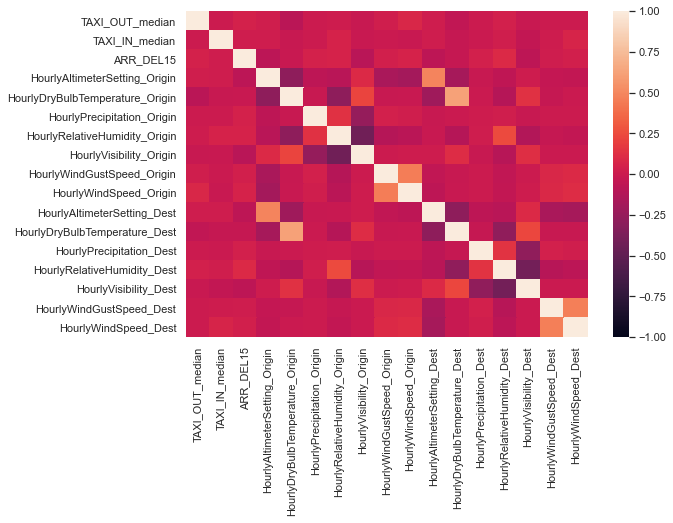

In [10]:
# Heatmap showing global correlations
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.heatmap(df_all.corr(), vmin=-1, vmax=1, annot=False, cbar=True, cmap=sns.cm.rocket);

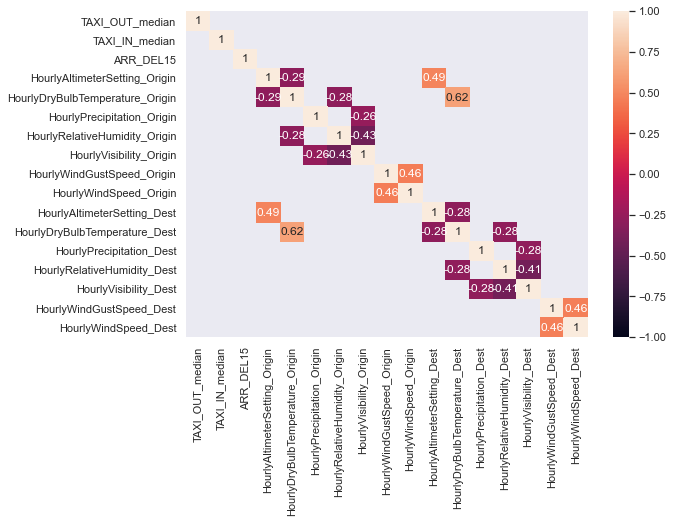

In [11]:
# Heatmap showing remarkable correlations
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.heatmap(df_all.corr(), vmin=-1, vmax=1, annot=True, cbar=True, cmap=sns.cm.rocket, mask=abs(df_all.corr()) < 0.25);

## 2. Dataset overview

In [12]:
# For deterministic purposes, let's define a seed:
np.random.seed(0)

In [13]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200053 entries, 0 to 7200052
Data columns (total 27 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   MONTH                            string 
 1   DAY_OF_WEEK                      string 
 2   OP_UNIQUE_CARRIER                string 
 3   ORIGIN                           string 
 4   DEST                             string 
 5   DEP_TIME_hour                    string 
 6   TAXI_OUT_median                  int32  
 7   TAXI_IN_median                   int32  
 8   ARR_DEL15                        int32  
 9   ARR_TIME_hour                    string 
 10  DISTANCE_GROUP                   string 
 11  HourlyAltimeterSetting_Origin    float64
 12  HourlyDryBulbTemperature_Origin  float64
 13  HourlyPrecipitation_Origin       float64
 14  HourlyRelativeHumidity_Origin    float64
 15  HourlySkyConditions_Origin       string 
 16  HourlyVisibility_Origin          float64
 17  HourlyWi

In [14]:
# For the initial runs, define a reasonably-sized sample:
sample_length = int(1e5)

# # The dataset is somehow imbalanced (80% on-time / 20% delayed), so let's perform some quick undersampling:
# delayed = df[df['ARR_DEL15'] == 1].sample(sample_length // 2)
# ontime = df[df['ARR_DEL15'] == 0].sample(sample_length // 2)
# df = delayed.append(ontime)

# Although the dataset is somehow imbalanced (80% on-time / 20% delayed), let's try to keep it as is for this test:
df = df_all.sample(sample_length)

# # Get dummies for the categorical features:
# df = pd.get_dummies(df)

print("On-time flights: {:7d} ({:5.2f}%)".format(len(df[df['ARR_DEL15'] == 0]), 100*len(df[df['ARR_DEL15'] == 0])/len(df)))
print("Delayed flights: {:7d} ({:5.2f}%)".format(len(df[df['ARR_DEL15'] == 1]), 100*len(df[df['ARR_DEL15'] == 1])/len(df)))

On-time flights:   81090 (81.09%)
Delayed flights:   18910 (18.91%)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 3046636 to 4934132
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   MONTH                            100000 non-null  string 
 1   DAY_OF_WEEK                      100000 non-null  string 
 2   OP_UNIQUE_CARRIER                100000 non-null  string 
 3   ORIGIN                           100000 non-null  string 
 4   DEST                             100000 non-null  string 
 5   DEP_TIME_hour                    100000 non-null  string 
 6   TAXI_OUT_median                  100000 non-null  int32  
 7   TAXI_IN_median                   100000 non-null  int32  
 8   ARR_DEL15                        100000 non-null  int32  
 9   ARR_TIME_hour                    100000 non-null  string 
 10  DISTANCE_GROUP                   100000 non-null  string 
 11  HourlyAltimeterSetting_Origin    100000 non-null  float64


### Train / Test split
Break the dataset into three blocks:
1. Training (80%) → cross-validation
2. Test (20%) → final evaluation

In [16]:
# Separate input features from the target:
X = df.drop('ARR_DEL15', axis=1)
y = df['ARR_DEL15']

# Train-test split the data:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80000, 26), (20000, 26), (80000,), (20000,))

In [17]:
def otp_describe(y):
    print("On-time flights: {:7d} ({:5.2f}%)".format(len(y[y == 0]), 100*len(y[y == 0])/len(y)))
    print("Delayed flights: {:7d} ({:5.2f}%)".format(len(y[y == 1]), 100*len(y[y == 1])/len(y)))

In [18]:
print("TRAIN:")
otp_describe(y_train)
print("TEST:")
otp_describe(y_test)

TRAIN:
On-time flights:   64808 (81.01%)
Delayed flights:   15192 (18.99%)
TEST:
On-time flights:   16282 (81.41%)
Delayed flights:    3718 (18.59%)


# Preprocessing

## Target Encoding
- Fit-transform on Training dataset
- Transform on Test dataset

In [19]:
def calc_smooth_mean(df, by, on, m):
    # Compute the global mean
    mean = df[on].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
    return df[by].map(smooth)

In [20]:
categorical_features = X_train.select_dtypes(['category', 'string']).columns

df_train = pd.concat([X_train, y_train], axis=1)
for cat_feature in categorical_features:
    df_train[cat_feature] = calc_smooth_mean(df_train, cat_feature, 'ARR_DEL15', 500) # Generally default to 300 
X_train = df_train.drop('ARR_DEL15', axis=1)
X_train

,MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME_hour,TAXI_OUT_median,TAXI_IN_median,ARR_TIME_hour,DISTANCE_GROUP,HourlyAltimeterSetting_Origin,HourlyDryBulbTemperature_Origin,HourlyPrecipitation_Origin,HourlyRelativeHumidity_Origin,HourlySkyConditions_Origin,HourlyVisibility_Origin,HourlyWindGustSpeed_Origin,HourlyWindSpeed_Origin,HourlyAltimeterSetting_Dest,HourlyDryBulbTemperature_Dest,HourlyPrecipitation_Dest,HourlyRelativeHumidity_Dest,HourlySkyConditions_Dest,HourlyVisibility_Dest,HourlyWindGustSpeed_Dest,HourlyWindSpeed_Dest
4736110,0.187450,0.182938,0.143050,0.157767,0.181283,0.255979,15,6,0.247949,0.200850,30.310,64.0,0.0,32.0,0.226771,10.00,0.0,0.0,30.08,59.0,0.0,72.0,0.170943,10.00,0.0,0.0
1427946,0.239474,0.207295,0.181734,0.172856,0.192632,0.151495,17,6,0.148495,0.178491,29.660,59.0,0.0,83.0,0.194185,9.94,0.0,7.0,29.81,73.0,0.0,76.0,0.231806,10.00,0.0,11.0
6395045,0.143194,0.200092,0.173907,0.192805,0.205352,0.223670,10,4,0.230252,0.194537,30.060,72.0,0.0,73.0,0.194185,9.94,0.0,3.0,30.04,45.0,0.0,74.0,0.191882,10.00,0.0,9.0
3182410,0.173398,0.195550,0.173907,0.150043,0.178292,0.141667,10,4,0.173454,0.197922,30.090,52.0,0.0,69.0,0.197849,10.00,0.0,10.0,30.02,47.0,0.0,63.0,0.231806,8.00,0.0,9.0
7098542,0.197679,0.200092,0.173907,0.169140,0.190058,0.243840,11,4,0.242045,0.178491,30.080,56.0,0.0,84.0,0.197849,10.00,0.0,10.0,30.12,58.0,0.0,67.0,0.172013,10.00,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4236174,0.187450,0.207295,0.143050,0.174743,0.159386,0.104782,11,7,0.105599,0.180278,29.930,41.0,0.0,82.0,0.176115,10.00,0.0,5.0,29.88,49.0,0.0,61.0,0.188629,9.94,0.0,3.0
5105024,0.187450,0.182938,0.207520,0.248235,0.190561,0.264911,20,4,0.242045,0.180278,29.575,74.0,0.0,43.0,0.194185,9.94,0.0,13.0,29.70,67.0,0.0,73.0,0.172013,10.00,37.0,24.0
1140242,0.187450,0.200092,0.212069,0.248729,0.187874,0.168355,22,9,0.173454,0.200762,29.790,70.0,0.0,66.0,0.197849,10.00,0.0,6.0,30.01,73.0,0.0,48.0,0.191882,10.00,0.0,15.0
6427387,0.173398,0.207295,0.143050,0.157767,0.202747,0.223670,15,5,0.230252,0.178491,30.030,71.0,0.0,68.0,0.197849,10.00,23.0,15.0,29.94,57.0,0.0,39.0,0.191882,10.00,0.0,8.0


In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 4736110 to 465382
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MONTH                            80000 non-null  float64
 1   DAY_OF_WEEK                      80000 non-null  float64
 2   OP_UNIQUE_CARRIER                80000 non-null  float64
 3   ORIGIN                           80000 non-null  float64
 4   DEST                             80000 non-null  float64
 5   DEP_TIME_hour                    80000 non-null  float64
 6   TAXI_OUT_median                  80000 non-null  int32  
 7   TAXI_IN_median                   80000 non-null  int32  
 8   ARR_TIME_hour                    80000 non-null  float64
 9   DISTANCE_GROUP                   80000 non-null  float64
 10  HourlyAltimeterSetting_Origin    80000 non-null  float64
 11  HourlyDryBulbTemperature_Origin  80000 non-null  float64
 12  HourlyPreci

# QUEDARÍA MAPEAR CADA VALOR DE CADA COLUMNA DEL ENCODING DE TRAINING, AL DE TEST (ES DECIR, HACER EL "TRANSFORM" DE ESE "FIT")
# De momento, hacerlo "mal", con su propio target encoding)

In [22]:
df_test = pd.concat([X_test, y_test], axis=1)
for cat_feature in categorical_features:
    df_test[cat_feature] = calc_smooth_mean(df_test, cat_feature, 'ARR_DEL15', 500) # Generally default to 300 
X_test = df_test.drop('ARR_DEL15', axis=1)
X_test

,MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME_hour,TAXI_OUT_median,TAXI_IN_median,ARR_TIME_hour,DISTANCE_GROUP,HourlyAltimeterSetting_Origin,HourlyDryBulbTemperature_Origin,HourlyPrecipitation_Origin,HourlyRelativeHumidity_Origin,HourlySkyConditions_Origin,HourlyVisibility_Origin,HourlyWindGustSpeed_Origin,HourlyWindSpeed_Origin,HourlyAltimeterSetting_Dest,HourlyDryBulbTemperature_Dest,HourlyPrecipitation_Dest,HourlyRelativeHumidity_Dest,HourlySkyConditions_Dest,HourlyVisibility_Dest,HourlyWindGustSpeed_Dest,HourlyWindSpeed_Dest
4183361,0.208680,0.167849,0.182922,0.187876,0.215217,0.149838,14,5,0.123315,0.181775,30.11,51.0,0.0,48.0,0.154348,10.0,0.0,0.0,30.21,50.0,0.0,77.0,0.155059,10.00,0.0,0.0
1669877,0.199537,0.193253,0.200484,0.204002,0.205326,0.215621,14,8,0.219497,0.187748,29.92,93.0,0.0,56.0,0.171946,10.0,0.0,13.0,29.94,91.0,0.0,56.0,0.174951,10.00,0.0,13.0
6530017,0.175197,0.199350,0.162262,0.177216,0.180114,0.233451,10,5,0.230997,0.190716,30.11,39.0,0.0,93.0,0.221699,6.0,0.0,5.0,30.07,52.0,0.0,89.0,0.182779,7.00,0.0,7.0
137214,0.180215,0.181777,0.168212,0.200712,0.204845,0.128523,14,13,0.123315,0.187748,29.83,74.0,0.0,85.0,0.154348,10.0,0.0,8.0,30.04,38.0,0.0,76.0,0.231188,10.00,0.0,15.0
2035597,0.170009,0.172632,0.162262,0.185300,0.168355,0.239114,9,4,0.243991,0.181775,30.29,53.0,0.0,74.0,0.190912,10.0,0.0,0.0,30.20,63.0,0.0,54.0,0.182779,10.00,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360071,0.208680,0.193310,0.162262,0.200712,0.191855,0.222258,16,4,0.227834,0.187748,29.93,80.0,0.0,60.0,0.171946,10.0,22.0,11.0,29.58,36.0,0.0,93.0,0.184556,9.94,0.0,13.0
6982396,0.175197,0.190168,0.142091,0.168750,0.185449,0.220717,14,5,0.218691,0.179842,30.22,29.0,0.0,85.0,0.221699,10.0,0.0,6.0,30.18,19.0,0.0,96.0,0.231188,1.75,0.0,9.0
1291585,0.186225,0.193310,0.207794,0.177417,0.163393,0.108595,14,5,0.123315,0.190716,30.06,67.0,0.0,91.0,0.171946,6.0,0.0,5.0,30.13,85.0,0.0,55.0,0.182779,10.00,0.0,20.0
5210011,0.199537,0.193253,0.197020,0.232394,0.181721,0.167320,22,5,0.165512,0.181775,30.25,85.0,0.0,43.0,0.171946,10.0,0.0,8.0,30.23,86.0,0.0,36.0,0.155059,10.00,0.0,3.0


## Preprocessing Pipeline

## PCA

### Habría que estudiar más el tema del PCA, pero ahora mismo, con un TargetEncoding, no parece ser muy útil reducir dimensionalidad, ya que el beneficio principalmente suele ser el tiempo, y en este caso no parece que redujéramos muchas dimensiones "poco útiles"

# Baseline model: `LogisticRegression`

### Cross-Fold Target Encoding
- To clamp down on the data leakage, we need to ensure that we’re not using the using the target value from a given sample to compute its target-encoded values
- Let’s create a transformer class to perform the cross-fold target encoding `TargetEncoderCV`
    - we may end up with NaNs (empty values) even when there were categories in the original dataframe
    - we can’t perform cross-fold encoding on our test data, because we don’t have any target values for which to compute the category means! → So, we have to use the category means from the training data in that case.
    ```python
    # Cross-fold Target encode the categorical data
    te = TargetEncoderCV()
    X_target_encoded_cv = te.fit_transform(X_train, y_train)
    X_target_encoded_cv.sample(10)
    
    # Compare category counts
    print('Original:')
    print(X_train.nunique())
    print('\nTarget encoded:')
    print(X_target_encoded_cv.nunique())
    ```
- We can fit the same model as before, but now using cross-fold target encoding:
    ```python
    # Regression model
    model_te_cv = Pipeline([
        ('encoder', TargetEncoderCV()),
        ('scaler', StandardScaler()),
        ('imputer', SimpleImputer(strategy='mean')),
        ('regressor', BayesianRidge())
    ])

    # Cross-validated MAE
    scores = cross_val_score(model_te_cv, X_train, y_train, 
                             cv=3, scoring=mae_scorer)
    print('Cross-validated MAE: %0.3f +/- %0.3f'
          % (scores.mean(), scores.std()))
    ```

In [27]:
# LogisticRegression model
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

model_te_cv = Pipeline([
#     ('encoder', TargetEncoderCV()),
    ('regressor', LogisticRegression(C=0.1, max_iter=10000))
])

# Cross-validated 'f1'
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_te_cv, X_train, y_train, 
                         cv=3, scoring='average_precision')
print('Cross-validated PR-AUC: %0.3f +/- %0.3f'
      % (scores.mean(), scores.std()))

Cross-validated PR-AUC: 0.330 +/- 0.006


# XGBoost

In [28]:
from xgboost import XGBClassifier

`num_boost_round`: corresponds to the number of boosting rounds or trees to build
- Its optimal value highly depends on the other parameters, and thus it should be re-tuned each time you update a parameter.
- You could do this by tuning it together with all parameters in a grid-search, but it requires a lot of computational effort.
- Fortunately XGBoost provides a nice way to find the best number of rounds whilst training.
- We can test our model at each step and see if adding a new tree/round improves performance.
- If performance haven’t improved for N rounds (N is defined by the variable `early_stopping_round`), we stop the training and keep the best number of boosting rounds.

In [29]:
# Summarize class distribution:
from collections import Counter

counter = Counter(y_train)
total_negative_examples = counter[0]
total_positive_examples = counter[1]

# A sensible default value to set for the scale_pos_weight hyperparameter is the inverse of the class distribution:
scale_pos_weight = total_negative_examples / total_positive_examples

print("TRAINING DATASET")
print("Total dataset:      {:7d} ({:6.2f}%)".format(len(X_train), 100*len(X_train)/len(X_train)))
print("On-time:            {:7d} ( {:5.2f}%)".format(total_negative_examples, 100*total_negative_examples/len(X_train)))
print("Delayed:            {:7d} ( {:5.2f}%)".format(total_positive_examples, 100*total_positive_examples/len(X_train)))
print("'scale_pos_weight' value: {:5.2f}".format(scale_pos_weight))

TRAINING DATASET
Total dataset:        80000 (100.00%)
On-time:              64808 ( 81.01%)
Delayed:              15192 ( 18.99%)
'scale_pos_weight' value:  4.27


[Soruce](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)  
Fine-tuning steps:
1. Choose a relatively **high learning rate**. Generally a learning rate of 0.1 works but somewhere between 0.05 to 0.3 should work for different problems. Determine the optimum number of trees for this learning rate. XGBoost has a very useful function called as “cv” which performs cross-validation at each boosting iteration and thus returns the optimum number of trees required.
    - max_depth = 5 : This should be between 3-10. I’ve started with 5 but you can choose a different number as well. 4-6 can be good starting points.
    - min_child_weight = 1 : A smaller value is chosen because it is a highly imbalanced class problem and leaf nodes can have smaller size groups.
    - gamma = 0 : A smaller value like 0.1-0.2 can also be chosen for starting. This will anyways be tuned later.
    - subsample, colsample_bytree = 0.8 : This is a commonly used used start value. Typical values range between 0.5-0.9.
    - scale_pos_weight = 1: Because of high class imbalance.
2. Tune tree-specific parameters ( max_depth, min_child_weight, gamma, subsample, colsample_bytree) for decided learning rate and number of trees. Note that we can choose different parameters to define a tree and I’ll take up an example here.
3. Tune regularization parameters (lambda, alpha) for xgboost which can help reduce model complexity and enhance performance.
4. Lower the learning rate and decide the optimal parameters .

In [72]:
# Basic model definition:
xgb_model = XGBClassifier(use_label_encoder=False, verbosity=1, random_state=0, objective= 'binary:logistic',
                          booster='gbtree', tree_method='auto', num_boost_round = 10000, early_stopping_round=10,
                          scale_pos_weight=scale_pos_weight)

params = {
            'min_child_weight': [100, 150, 200],
            'gamma': [0.5],
            'subsample': [0.9],
            'colsample_bytree': [0.7],
            'max_depth': [6, 7, 8, 9],
            'learning_rate': [0.05, 0.1, 0.15],
            'n_estimators': [200, 350, 500],
            'reg_alpha': [1e-4],
            'reg_lambda': [1]
        }

# Step 6: Reducing Learning Rate !!!!! Probar

In [74]:
folds = 5
avg_fitting_time = 85 / folds # seconds on average
actual_combinations = 108

combinations = 1
for k, v in params.items():
    combinations *= len(v)

fittings = folds * combinations
total_time = fittings * avg_fitting_time
print("Number of parameter combinations:", combinations)
print("Considering a 5-fold cross-validation, total fittings:", fittings)
print("All combination estimated time: {:2.0f}h {:2.0f}min {:2.0f}s".format(total_time//3600,
                                                                           (total_time%3600)//60,
                                                                           (total_time%3600)%60))


actual_total_time = actual_combinations * folds * avg_fitting_time
print("Actual fittings estimated time: {:2.0f}h {:2.0f}min {:2.0f}s".format(actual_total_time//3600,
                                                                           (actual_total_time%3600)//60,
                                                                           (actual_total_time%3600)%60))

Number of parameter combinations: 108
Considering a 5-fold cross-validation, total fittings: 540
All combination estimated time:  2h 33min  0s
Actual fittings estimated time:  2h 33min  0s


## Training

Info: https://stackoverflow.com/questions/51587535/custom-evaluation-function-based-on-f1-for-use-in-xgboost-python-api

In [76]:
# Source: https://github.com/dask/dask-searchcv/issues/51
# Info: https://ml.dask.org/modules/generated/dask_ml.model_selection.RandomizedSearchCV.html

from dask_ml.model_selection import RandomizedSearchCV
from dask.diagnostics import ProgressBar

dask_rscv = RandomizedSearchCV(xgb_model, 
                               cv=5,
                               param_distributions=params, 
                               n_iter=108, # Number of parameter settings that are sampled → trades off runtime vs quality
                               scoring='average_precision', # AP summarizes a precision-recall curve
                               n_jobs=-2, # all CPUs but one are used
                               random_state=0)

with ProgressBar():
    dask_rscv.fit(X=X_train, y=y_train)

[########################################] | 100% Completed |  3hr  2min  4.9s
[########################################] | 100% Completed | 33.2s


In [77]:
cv_res = pd.DataFrame(dask_rscv.cv_results_)
cv_res.sort_values(by='rank_test_score', ascending=True)

,params,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,param_subsample,param_reg_lambda,param_reg_alpha,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree
19,"{'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...",64.484890,1.066339,0.167949,0.014849,0.397998,0.387459,0.394625,0.400023,0.393773,0.394776,0.004301,1,0.9,1,0.0001,350,100,8,0.05,0.5,0.7
32,"{'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...",102.254878,1.025449,0.226911,0.017485,0.394721,0.389443,0.394401,0.400610,0.393494,0.394534,0.003577,2,0.9,1,0.0001,500,150,9,0.05,0.5,0.7
28,"{'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...",73.065326,0.486366,0.177022,0.005332,0.396353,0.390886,0.389877,0.401788,0.393407,0.394462,0.004293,3,0.9,1,0.0001,350,100,9,0.05,0.5,0.7
20,"{'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...",91.293384,0.713733,0.212133,0.017890,0.395811,0.386667,0.396210,0.400316,0.393306,0.394462,0.004500,4,0.9,1,0.0001,500,100,8,0.05,0.5,0.7
31,"{'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...",71.387315,0.645661,0.172995,0.005290,0.395643,0.389703,0.394007,0.399961,0.392768,0.394416,0.003387,5,0.9,1,0.0001,350,150,9,0.05,0.5,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,"{'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...",101.575579,0.823613,0.232664,0.023229,0.375352,0.372349,0.378476,0.385489,0.380500,0.378433,0.004485,104,0.9,1,0.0001,500,150,9,0.15,0.5,0.7
100,"{'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...",72.672752,0.270672,0.177300,0.019525,0.375073,0.374795,0.375581,0.383234,0.380038,0.377744,0.003344,105,0.9,1,0.0001,350,100,9,0.15,0.5,0.7
107,"{'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...",91.352834,13.365411,0.214921,0.017210,0.377396,0.367317,0.378040,0.382220,0.380275,0.377050,0.005157,106,0.9,1,0.0001,500,200,9,0.15,0.5,0.7
101,"{'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...",104.477268,0.977868,0.229329,0.015760,0.373094,0.373656,0.374883,0.381657,0.375006,0.375659,0.003086,107,0.9,1,0.0001,500,100,9,0.15,0.5,0.7


In [78]:
dask_rscv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, early_stopping_round=10,
              gamma=0.5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=8, min_child_weight=100, missing=nan,
              monotone_constraints='()', n_estimators=350, n_jobs=4,
              num_boost_round=10000, num_parallel_tree=1, random_state=0,
              reg_alpha=0.0001, reg_lambda=1,
              scale_pos_weight=4.265929436545551, subsample=0.9,
              tree_method='auto', use_label_encoder=False,
              validate_parameters=1, verbosity=1)

In [79]:
dask_rscv.best_score_

0.39477572566899105

In [80]:
dask_rscv.best_params_

{'subsample': 0.9,
 'reg_lambda': 1,
 'reg_alpha': 0.0001,
 'n_estimators': 350,
 'min_child_weight': 100,
 'max_depth': 8,
 'learning_rate': 0.05,
 'gamma': 0.5,
 'colsample_bytree': 0.7}

In [81]:
dask_rscv.best_index_

19

In [82]:
dask_rscv.scorer_

make_scorer(average_precision_score, needs_threshold=True)

In [83]:
dask_rscv.get_params

<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster='gbtree',
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_round=10, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constr...
                                           use_label_encoder=False,
                                           validate_parameters=None,
  

In [84]:
dask_rscv.predict(X_test)

array([0, 1, 1, ..., 0, 0, 0])

In [85]:
dask_rscv.predict_proba(X_test)

array([[0.7432109 , 0.25678912],
       [0.45418626, 0.54581374],
       [0.4652686 , 0.5347314 ],
       ...,
       [0.81016695, 0.18983302],
       [0.5573018 , 0.44269818],
       [0.7454756 , 0.2545244 ]], dtype=float32)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.231916 to fit


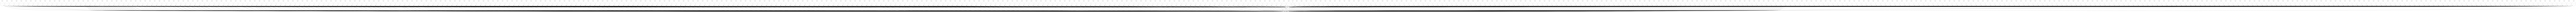

In [86]:
dask_rscv.visualize(filename='dask_rscv_28', format='png')

In [87]:
best_dask_rscv = dask_rscv.best_estimator_
best_dask_rscv

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, early_stopping_round=10,
              gamma=0.5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=8, min_child_weight=100, missing=nan,
              monotone_constraints='()', n_estimators=350, n_jobs=4,
              num_boost_round=10000, num_parallel_tree=1, random_state=0,
              reg_alpha=0.0001, reg_lambda=1,
              scale_pos_weight=4.265929436545551, subsample=0.9,
              tree_method='auto', use_label_encoder=False,
              validate_parameters=1, verbosity=1)

## Evaluation

### Additional metrics results

In [88]:
# Evaluate the model's metrics:

from sklearn.metrics import fbeta_score, f1_score, recall_score, precision_score, accuracy_score, \
                            confusion_matrix, classification_report, roc_curve, precision_recall_curve, \
                            roc_auc_score, average_precision_score, plot_roc_curve, plot_precision_recall_curve

def clf_metrics(classifier, X_test, y_test, y_pred):
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print("Normalized confusion matrix:\n", confusion_matrix(y_test, y_pred, normalize='true'), '\n')
    print(classification_report(y_test, y_pred, target_names=['on-time', 'delayed']))
    print("F-beta (ß=2) = {:6.3f}".format(fbeta_score(y_test, y_pred, beta=2)))   
    print("F1 =           {:6.3f}".format(f1_score(y_test, y_pred)))   
    print("Recall =       {:6.3f}".format(recall_score(y_test, y_pred)))   
    print("Precision =    {:6.3f}".format(precision_score(y_test, y_pred)))   
    print("Accuracy =     {:6.3f}".format(accuracy_score(y_test, y_pred)))

### Test

In [89]:
y_train_pred = best_dask_rscv.predict(X_train)
y_test_pred = best_dask_rscv.predict(X_test)
y_test_pred

array([0, 1, 1, ..., 0, 0, 0])

In [90]:
print("-+-+-+ TRAINING dataset +-+-+-\n")
clf_metrics(best_dask_rscv, X_train, y_train, y_train_pred)
print("-------------------------------------------------------\n")
print("-+-+-+ TEST dataset: +-+-+-\n")
clf_metrics(best_dask_rscv, X_test, y_test, y_test_pred)

-+-+-+ TRAINING dataset +-+-+-

Confusion matrix:
 [[48373 16435]
 [ 3902 11290]]
Normalized confusion matrix:
 [[0.74640476 0.25359524]
 [0.25684571 0.74315429]] 

              precision    recall  f1-score   support

     on-time       0.93      0.75      0.83     64808
     delayed       0.41      0.74      0.53     15192

    accuracy                           0.75     80000
   macro avg       0.67      0.74      0.68     80000
weighted avg       0.83      0.75      0.77     80000

F-beta (ß=2) =  0.638
F1 =            0.526
Recall =        0.743
Precision =     0.407
Accuracy =      0.746
-------------------------------------------------------

-+-+-+ TEST dataset: +-+-+-

Confusion matrix:
 [[12703  3579]
 [ 1857  1861]]
Normalized confusion matrix:
 [[0.78018671 0.21981329]
 [0.49946208 0.50053792]] 

              precision    recall  f1-score   support

     on-time       0.87      0.78      0.82     16282
     delayed       0.34      0.50      0.41      3718

    accuracy   

### ROC curve

In [91]:
y_train_probabilities = best_dask_rscv.predict_proba(X_train)[:,1]
y_test_probabilities = best_dask_rscv.predict_proba(X_test)[:,1]
y_test_probabilities[:10]

array([0.25678912, 0.54581374, 0.5347314 , 0.23937774, 0.38748077,
       0.42336047, 0.30766445, 0.55284446, 0.49989143, 0.71338403],
      dtype=float32)

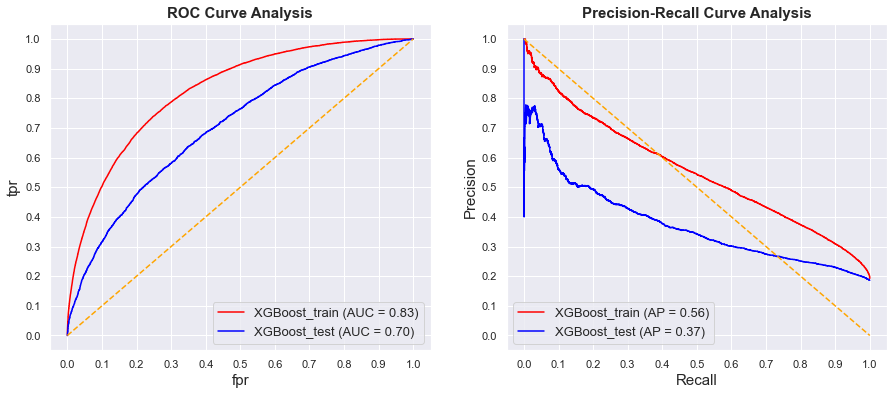

In [92]:
# Plot the figure:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
       
plot_roc_curve(best_dask_rscv, X_train, y_train, color='red', name='XGBoost_train', ax=ax[0])
plot_roc_curve(best_dask_rscv, X_test, y_test, color='blue', name='XGBoost_test', ax=ax[0])
ax[0].plot([0,1], [0,1], color='orange', linestyle='--')

ax[0].set_xticks(np.arange(0.0, 1.1, step=0.1))
ax[0].set_xlabel("fpr", fontsize=15)

ax[0].set_yticks(np.arange(0.0, 1.1, step=0.1))
ax[0].set_ylabel("tpr", fontsize=15)

ax[0].set_title('ROC Curve Analysis', fontweight='bold', fontsize=15)
ax[0].legend(prop={'size':13}, loc='lower right')


plot_precision_recall_curve(best_dask_rscv, X_train, y_train, color='red', name='XGBoost_train', ax=ax[1])
plot_precision_recall_curve(best_dask_rscv, X_test, y_test, color='blue', name='XGBoost_test', ax=ax[1])
ax[1].plot([0,1], [1,0], color='orange', linestyle='--')

ax[1].set_xticks(np.arange(0.0, 1.1, step=0.1))
ax[1].set_xlabel("Recall", fontsize=15)

ax[1].set_yticks(np.arange(0.0, 1.1, step=0.1))
ax[1].set_ylabel("Precision", fontsize=15)

ax[1].set_title('Precision-Recall Curve Analysis', fontweight='bold', fontsize=15)
ax[1].legend(prop={'size':13}, loc='lower left')

## Plotting

### Feature importance (data)

In [93]:
# Let's build a dictionary to better see each INFORMATIVE feature with its corresponding importance:
feature_importance_dict = dict(zip(X_train.columns, best_dask_rscv.feature_importances_))
feature_importance_df = pd.DataFrame(feature_importance_dict.items(), columns=['Feature', 'Importance']) \
                          .sort_values(by='Importance', ascending=False)
feature_importance_df = feature_importance_df[feature_importance_df['Importance'] != 0]
feature_importance_df

,Feature,Importance
5,DEP_TIME_hour,0.084193
8,ARR_TIME_hour,0.077555
15,HourlyVisibility_Origin,0.063127
12,HourlyPrecipitation_Origin,0.047077
20,HourlyPrecipitation_Dest,0.044337
3,ORIGIN,0.043196
0,MONTH,0.042563
13,HourlyRelativeHumidity_Origin,0.042435
21,HourlyRelativeHumidity_Dest,0.039718
2,OP_UNIQUE_CARRIER,0.037899


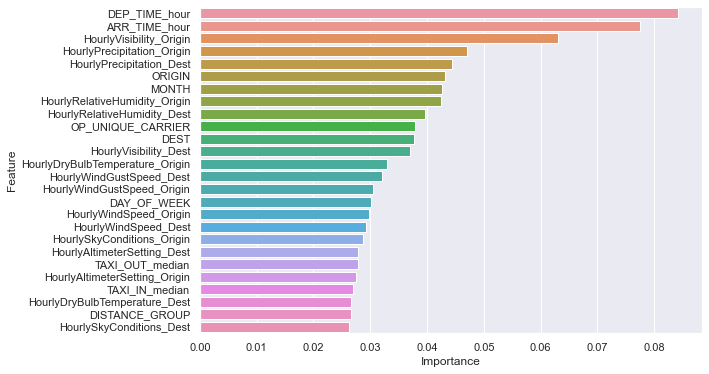

In [94]:
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.barplot(y='Feature', x='Importance', data=feature_importance_df, orient='h');

### Permutation Feature Importance

In [95]:
# Source: https://machinelearningmastery.com/calculate-feature-importance-with-python/

from sklearn.inspection import permutation_importance

# perform permutation importance
results = permutation_importance(best_dask_rscv, X_train, y_train, scoring='average_precision')
# get importance
importance = dict(zip(X_train.columns, results.importances_mean))
permutation_importance_df = pd.DataFrame(importance.items(), columns=['Feature', 'Permutation_Importance']) \
                          .sort_values(by='Permutation_Importance', ascending=False)
permutation_importance_df = permutation_importance_df[permutation_importance_df['Permutation_Importance'] != 0]
permutation_importance_df

,Feature,Permutation_Importance
13,HourlyRelativeHumidity_Origin,0.076724
5,DEP_TIME_hour,0.074157
3,ORIGIN,0.070357
4,DEST,0.067063
11,HourlyDryBulbTemperature_Origin,0.057442
0,MONTH,0.056726
21,HourlyRelativeHumidity_Dest,0.052255
2,OP_UNIQUE_CARRIER,0.038259
19,HourlyDryBulbTemperature_Dest,0.037418
10,HourlyAltimeterSetting_Origin,0.033802


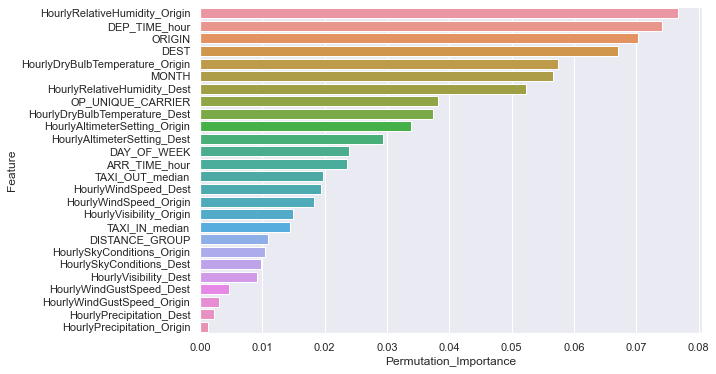

In [96]:
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.barplot(y='Feature', x='Permutation_Importance', data=permutation_importance_df, orient='h');

### Feature importance (plot)

#### Weight-based

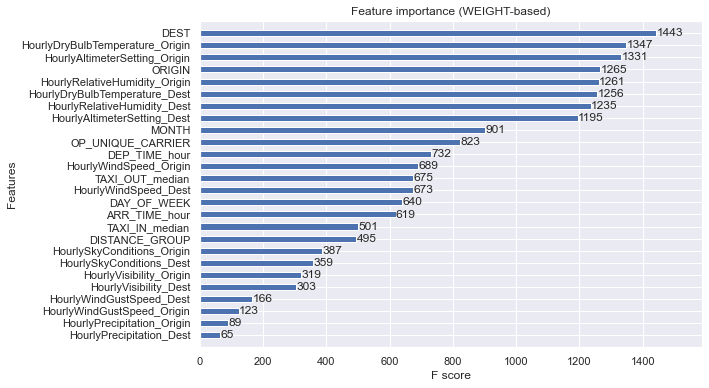

In [97]:
from xgboost import plot_importance

fig,ax = plt.subplots(figsize=(9,6))

plot_importance(booster=best_dask_rscv,
                ax=ax,
                grid=True,
                importance_type='weight', # ”weight” is the number of times a feature appears in a tree
                max_num_features=None, 
                height=0.5,
                xlim=None,
                ylim=None, 
                title='Feature importance (WEIGHT-based)',
                xlabel='F score',
                ylabel='Features',
                show_values=True);

#### Gain-based

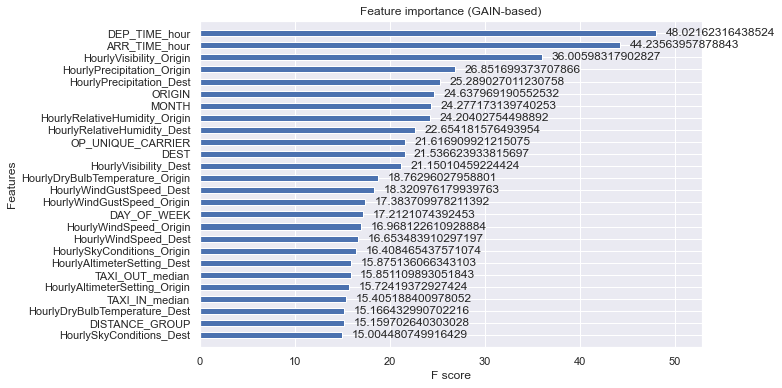

In [98]:
from xgboost import plot_importance

fig,ax = plt.subplots(figsize=(9,6))

plot_importance(booster=best_dask_rscv,
                ax=ax,
                grid=True,
                importance_type='gain',
                max_num_features=None, 
                height=0.5,
                xlim=None,
                ylim=None, 
                title='Feature importance (GAIN-based)',
                xlabel='F score',
                ylabel='Features',
                show_values=True);

### Tree

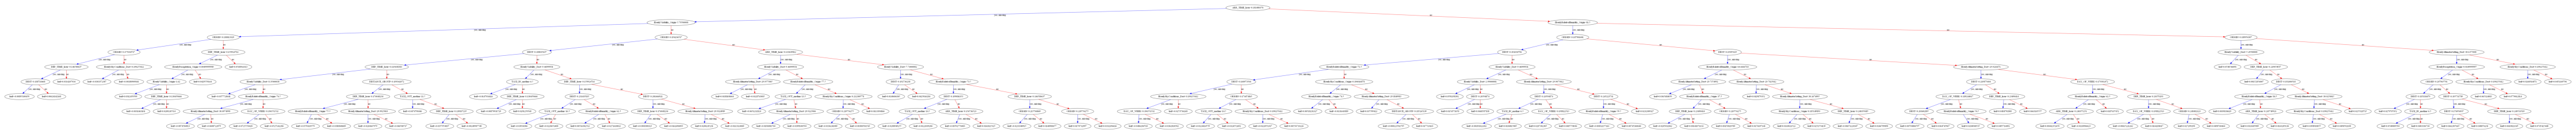

In [99]:
from xgboost import plot_tree

fig,ax = plt.subplots(figsize=(80,50))

plot_tree(booster=best_dask_rscv,
          num_trees=0,
          ax=ax)

plt.savefig('plot_tree_28_best_dask_rscv.png')

### Graphviz (tree)

*Convert specified tree to graphviz instance. IPython can automatically plot the returned graphiz instance. Otherwise, you should call `.render()` method of the returned graphiz instance.*

In [100]:
from xgboost import to_graphviz

tree_graphviz = to_graphviz(booster=best_dask_rscv,
                            yes_color='#0000FF',
                            no_color='#FF0000',
                            condition_node_params={'shape': 'box',
                                                   'style': 'filled,rounded',
                                                   'fillcolor': '#78bceb'},
                            leaf_node_params={'shape': 'box',
                                              'style': 'filled',
                                              'fillcolor': '#e48038'})

format = 'png'
tree_graphviz = to_graphviz(best_dask_rscv)
tree_graphviz.graph_attr = {'dpi':'400'}
tree_graphviz.render('tree_graphviz_28_best_dask_rscv', format = format)

'tree_graphviz_28_best_dask_rscv.png'

___

In [101]:
t1 = time.perf_counter() - t0
print("Time elapsed: {:2.0f}h {:2.0f}min {:2.0f}s".format(t1//3600, (t1%3600)//60, (t1%3600)%60))

Time elapsed:  6h 55min 26s


## Save the model

In [102]:
from joblib import dump, load

# Save model to file:
dump(best_dask_rscv, "XGBoost_28_best_dask_rscv.joblib.dat")
print("Saved model to: XGBoost_28_best_dask_rscv.joblib.dat")

Saved model to: XGBoost_28_best_dask_rscv.joblib.dat


In [103]:
# Load model from file:
loaded_model = load("XGBoost_28_best_dask_rscv.joblib.dat")
print("Loaded model from: XGBoost_28_best_dask_rscv.joblib.dat")

Loaded model from: XGBoost_28_best_dask_rscv.joblib.dat


In [104]:
# Make predictions for test data
predictions = loaded_model.predict(X_test)

# Evaluate predictions:
recall = recall_score(y_test, predictions)
print("Loaded model recall: {:6.3f}".format(recall))

Loaded model recall:  0.501


___

___